# Reading 10X Cell Ranger output directly

If for whatever reason you've decided to skip the reannotation/preprocessing, you can read the files directly from the Cell Ranger output folder with `Dandelion`'s `ddl.read_10x_vdj`, which accepts the `*_contig_annotations.csv` or `all_contig_annotations.json` file(s) as input. If reading with the `.csv` file, and the `.fasta` file and/or `.json` file(s) are in the same folder, `ddl.read_10x_vdj` will try to extract additional information not found in the `.csv` file e.g. contig sequences.

From <b>Cell Ranger V4</b> onwards, there is also an `airr_rearrangement.tsv` file that can be used directly with `Dandelion`. However, doing so will miss out on the reannotation steps but that is entirely up to you.

We will download the <b>airr_rearrangement.tsv</b> file from here:
```bash
# bash
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_filtered_contig_annotations.csv
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_filtered_contig.fasta
# wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_all_contig_annotations.json
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_airr_rearrangement.tsv
```


<b>Import dandelion module</b>

In [1]:
import os
import dandelion as ddl

# change directory to somewhere more workable
os.chdir(os.path.expanduser("~/Downloads/dandelion_tutorial/"))
ddl.logging.print_versions()

dandelion==0.3.4.dev30 pandas==2.0.1 numpy==1.24.3 matplotlib==3.7.1 networkx==3.1 scipy==1.11.2


With `ddl.read_10x_vdj`:

In [2]:
folder_location = "sc5p_v2_hs_PBMC_10k"
# or file_location = 'sc5p_v2_hs_PBMC_10k/'
vdj = ddl.read_10x_vdj(
    folder_location, filename_prefix="sc5p_v2_hs_PBMC_10k_b_filtered"
)
vdj

Dandelion class object with n_obs = 994 and n_contigs = 2601
    data: 'cell_id', 'is_cell_10x', 'sequence_id', 'high_confidence_10x', 'sequence_length_10x', 'locus', 'v_call', 'd_call', 'j_call', 'c_call', 'complete_vdj', 'productive', 'junction_aa', 'junction', 'consensus_count', 'duplicate_count', 'clone_id', 'raw_consensus_id_10x', 'sequence', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_

With `ddl.read_10x_airr`:

In [3]:
# read in the airr_rearrangement.tsv file
file_location = (
    "sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_airr_rearrangement.tsv"
)
vdj = ddl.read_10x_airr(file_location)
vdj

Dandelion class object with n_obs = 994 and n_contigs = 2093
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_

We will continue with the rest of the filtering part of the analysis to show how it slots smoothly with the rest of the workflow.

<b>Import modules for use with scanpy</b>

In [4]:
import pandas as pd
import numpy as np
import scanpy as sc
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata

warnings.filterwarnings("ignore")
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.11.2 pandas==2.0.1 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


<b>Import the transcriptome data</b>

In [5]:
adata = sc.read_10x_h5(
    "sc5p_v2_hs_PBMC_10k/filtered_feature_bc_matrix.h5", gex_only=True
)
adata.obs["sample_id"] = "sc5p_v2_hs_PBMC_10k"
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 10553 × 36601
    obs: 'sample_id'
    var: 'gene_ids', 'feature_types', 'genome'

Run QC on the transcriptome data.

In [6]:
ddl.pp.recipe_scanpy_qc(adata)
adata

AnnData object with n_obs × n_vars = 10553 × 36601
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'is_doublet', 'filter_rna'
    var: 'gene_ids', 'feature_types', 'genome'

Run the filtering of bcr data. Note that I'm using the `Dandelion` object as input rather than the pandas dataframe (yes both types of input will works. In fact, a file path to the .tsv will work too).

In [7]:
# The function will return both objects.
vdj, adata = ddl.pp.check_contigs(vdj, adata)

Preparing data: 2093it [00:00, 16146.33it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 994/994 [00:01<00:00, 977.40it/s] 


<b>Check the output V(D)J table</b>

The vdj table is returned as a `Dandelion` class object in the `.data` slot; if a file was provided for `filter_bcr` above, a new file will be created in the same folder with the `filtered` prefix. Note that this V(D)J table is indexed based on contigs (sequence_id).

In [8]:
vdj

Dandelion class object with n_obs = 984 and n_contigs = 2093
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus', 'rearrangement_status', 'ambiguous'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ'

<b>Check the AnnData object as well</b>

And the `AnnData` object is indexed based on cells.

In [9]:
adata

AnnData object with n_obs × n_vars = 10553 × 36601
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ'
    var: 'gene_

<b>The number of cells that actually has a matching BCR can be tabluated.</b>

In [10]:
pd.crosstab(adata.obs["has_contig"], adata.obs["chain_status"])

chain_status,Extra pair,Extra pair-exception,No_contig,Orphan VDJ,Orphan VJ,Single pair
has_contig,,,,,,
No_contig,0,0,9569,0,0,0
True,57,2,0,5,39,881


<b>Now actually filter the AnnData object and run through a standard workflow starting by filtering genes and normalizing the data</b>

Because the 'filtered' `AnnData` object was returned as a filtered but otherwise unprocessed object, we still need to normalize and run through the usual process here. The following is just a standard scanpy workflow.

In [11]:
adata = adata[
    adata.obs["filter_rna"] == "False"
]  # from ddl.pp.recipe_scanpy_qc
# filter genes
sc.pp.filter_genes(adata, min_cells=3)
# Normalize the counts
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata)
# Stash the normalised counts
adata.raw = adata

<b>Identify highly-variable genes</b>

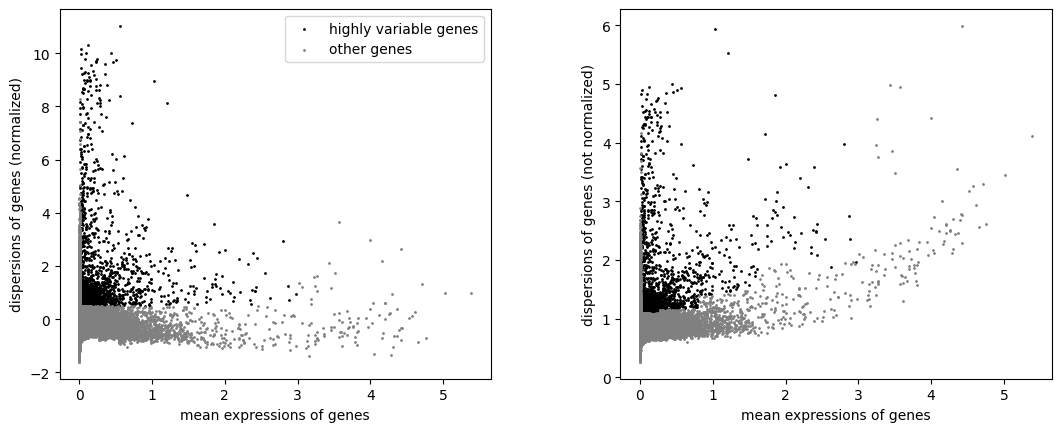

In [12]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

<b>Filter the genes to only those marked as highly-variable</b>

In [13]:
adata = adata[:, adata.var.highly_variable]

<b>Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.</b>

In [14]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata, max_value=10)

<b>Run PCA</b>

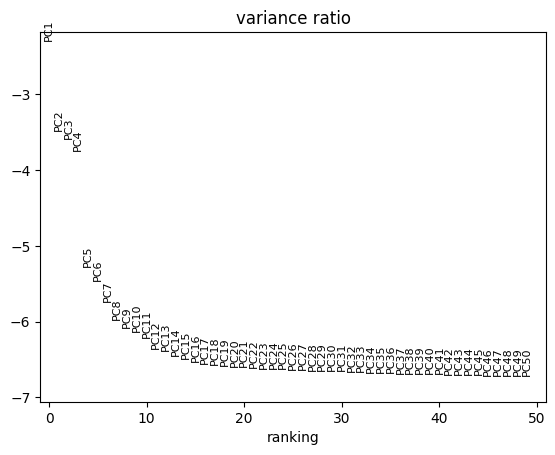

In [15]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

<b>Computing the neighborhood graph, umap and clusters</b>

In [16]:
# Computing the neighborhood graph
sc.pp.neighbors(adata)
# Embedding the neighborhood graph
sc.tl.umap(adata)
# Clustering the neighborhood graph
sc.tl.leiden(adata)

<b>Visualizing the clusters and whether or not there's a corresponding BCR</b>

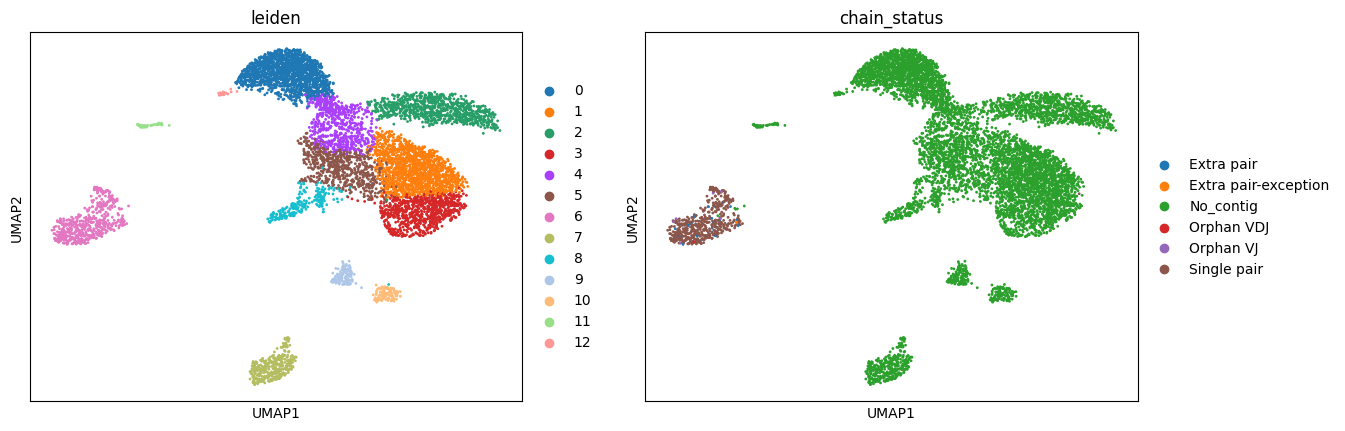

In [17]:
sc.pl.umap(adata, color=["leiden", "chain_status"])

<b>Visualizing some B cell genes</b>

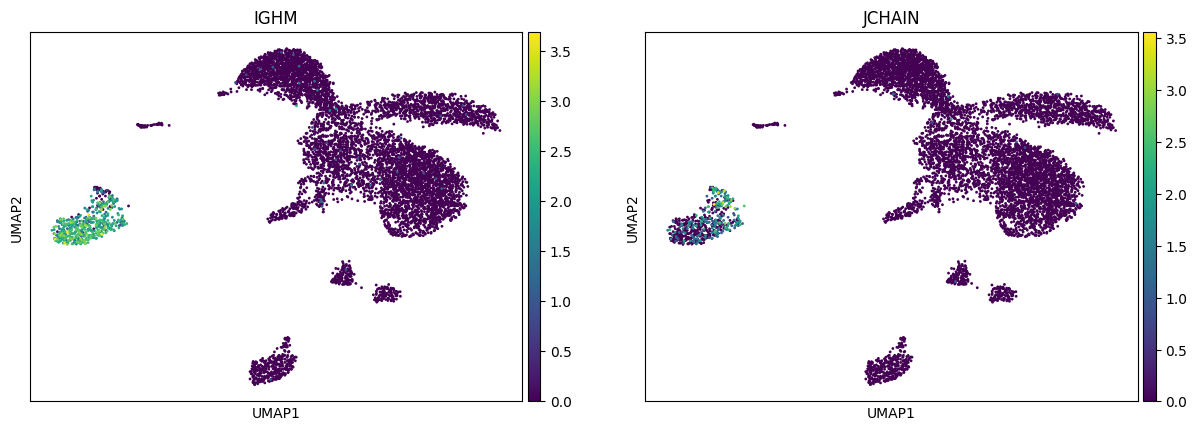

In [18]:
sc.pl.umap(adata, color=["IGHM", "JCHAIN"])

<b>Save AnnData</b>

We can save this `AnnData` object for now.

In [19]:
adata.write("adata2.h5ad", compression="gzip")

<b>Save dandelion</b>

To save the vdj object, we have two options - either save the `.data` and `.metadata` slots with pandas' functions:

In [20]:
vdj.data.to_csv("filtered_vdj_table2.tsv", sep="\t")

In [21]:
vdj.write_h5ddl("dandelion_results2.h5ddl", complib="bzip2")

### Concatenating multiple bcr objects

It is quite common that one might be trying to analyse data from multiple samples. In that case, `dandelion` has a `concat` function to merge the data.

We will simulate a second object but reading in the same file.

In [22]:
vdj1 = ddl.read_10x_airr(file_location)
vdj2 = ddl.read_10x_airr(file_location)

Before you merge the objects, make sure that the "cell_id" and "sequence_id" are distinct so that you can distinguish them later

In [23]:
# note: if the you reannotated the data with the full processing pipeline i.e. ran ddl.pp.format_fasta, this is already taken care of.
vdj1.data.cell_id = ["run1" + "_" + x for x in vdj1.data.cell_id]
vdj2.data.cell_id = ["run2" + "_" + x for x in vdj2.data.cell_id]

# probably don't need to modify the sequence_id. the concat function will check for unique and append -0, -1  etc when it encounters non-unique sequence_ids
# vdj1.data.sequence_id = ["run1" + '_' + x for x in vdj1.data.sequence_id]
# vdj2.data.sequence_id = ["run2" + '_' + x for x in vdj2.data.sequence_id]
# you can also reinitialise just in case so that the info is propagated properly (unnecessary here)
# vdj1 = ddl.Dandelion(vdj1.data)
# vdj2 = ddl.Dandelion(vdj2.data)

In [24]:
vdj_merged = ddl.concat([vdj1, vdj2])
vdj_merged

Dandelion class object with n_obs = 1988 and n_contigs = 4186
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate

In [25]:
vdj_merged.data

,cell_id,sequence_id,sequence,sequence_aa,productive,rev_comp,v_call,v_cigar,d_call,d_cigar,...,d_sequence_end,j_sequence_start,j_sequence_end,c_sequence_start,c_sequence_end,consensus_count,duplicate_count,is_cell,locus,rearrangement_status
sequence_id,,,,,,,,,,,,,,,,,,,,,
AAACCTGTCATATCGG-1_contig_1-0,run1_AAACCTGTCATATCGG-1,AAACCTGTCATATCGG-1_contig_1-0,TGGGGAGGAGTCAGTCCCAACCAGGACACGGCCTGGACATGAGGGT...,MRVPAQLLGLLLLWLSGARCDIQMTQSPSSLSASVGDRVTITCQAT...,T,F,IGKV1-8,38S314M204S,NaN,NaN,...,NaN,384,420,421,556,9139,68,T,IGK,standard
AAACCTGTCCGTTGTC-1_contig_2-0,run1_AAACCTGTCCGTTGTC-1,AAACCTGTCCGTTGTC-1_contig_2-0,ATCACATAACAACCACATTCCTCCTCTAAAGAAGCCCCTGGGAGCA...,MDWTWRFLFVVAAATGVQSQVQLVQSGAEVKKPGSSVKVSCKASGG...,T,F,IGHV1-69D,58S353M154S,IGHD3-22,411S31M123S,...,442.0,445,494,495,565,4161,51,T,IGH,standard
AAACCTGTCCGTTGTC-1_contig_1-0,run1_AAACCTGTCCGTTGTC-1,AAACCTGTCCGTTGTC-1_contig_1-0,AGGAGTCAGACCCTGTCAGGACACAGCATAGACATGAGGGTCCCCG...,MRVPAQLLGLLLLWLPGARCAIRMTQSPSSFSASTGDRVTITCRAS...,T,F,IGKV1-8,33S345M173S,NaN,NaN,...,NaN,378,415,416,551,5679,43,T,IGK,standard
AAACCTGTCGAGAACG-1_contig_1-0,run1_AAACCTGTCGAGAACG-1,AAACCTGTCGAGAACG-1_contig_1-0,ACTGTGGGGGTAAGAGGTTGTGTCCACCATGGCCTGGACTCCTCTC...,MAWTPLLLLFLSHCTGSLSQAVLTQPSSLSASPGASGRLTCTLRSD...,T,F,IGLV5-45,28S369M245S,NaN,NaN,...,NaN,394,431,432,642,13160,90,T,IGL,standard
AAACCTGTCGAGAACG-1_contig_2-0,run1_AAACCTGTCGAGAACG-1,AAACCTGTCGAGAACG-1_contig_2-0,GGGAGCATCACCCAGCAACCACATCTGTCCTCTAGAGAATCCCCTG...,MDWTWRILFLVAAATGAHSQVQLVQSGGEVKKPGASVKVSCKASGY...,T,F,IGHV1-2,64S353M133S,NaN,NaN,...,NaN,430,479,480,550,5080,47,T,IGH,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCAGAGCTT-1_contig_2-1,run2_TTTGGTTTCAGAGCTT-1,TTTGGTTTCAGAGCTT-1_contig_2-1,GGGAGAGCCCTGGGGAGGAACTGCTCAGTTAGGACCCAGAGGGAAC...,MEAPAQLLFLLLLWLPDTTGEIVLTQSPATLSLSPGERATLSCRAS...,T,F,IGKV3-11,47S345M170S,NaN,NaN,...,NaN,389,426,427,562,11867,73,T,IGK,standard
TTTGGTTTCAGTGTTG-1_contig_1-1,run2_TTTGGTTTCAGTGTTG-1,TTTGGTTTCAGTGTTG-1_contig_1-1,GGGGTCACAAGAGGCAGCGCTCTCGGGACGTCTCCACCATGGCCTG...,MAWALLLLTLLTQDTGSWAQSALTQPASVSGSPGQSITISCTGTSS...,T,F,IGLV2-23,38S340M262S,NaN,NaN,...,NaN,392,429,430,640,6497,58,T,IGL,standard
TTTGGTTTCAGTGTTG-1_contig_2-1,run2_TTTGGTTTCAGTGTTG-1,TTTGGTTTCAGTGTTG-1_contig_2-1,ATATTTCGTATCTGGGGAGTGACTCCTGTGCCCCACCATGGACACA...,MDTLCSTLLLLTIPSWVLSQITLKESGPTLVKPTQTLTLTCTFSGF...,T,F,IGHV2-5,37S358M122S,NaN,NaN,...,NaN,399,446,447,517,3530,33,T,IGH,standard


In [26]:
vdj_merged.metadata

,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,j_call_VJ,c_call_VDJ,...,d_call_B_VDJ_main,j_call_B_VDJ_main,v_call_B_VJ_main,j_call_B_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
run1_AAACCTGTCATATCGG-1,None,IGK,None,T,None,None,None,IGKV1-8,IGKJ4,None,...,None,None,IGKV1-8,IGKJ4,None,None,Orphan IGK,Orphan VJ,None,standard
run1_AAACCTGTCCGTTGTC-1,IGH,IGK,T,T,IGHV1-69D,IGHD3-22,IGHJ3,IGKV1-8,IGKJ1,IGHM,...,IGHD3-22,IGHJ3,IGKV1-8,IGKJ1,IgM,IgM,IGH + IGK,Single pair,standard,standard
run1_AAACCTGTCGAGAACG-1,IGH,IGL,T,T,IGHV1-2,None,IGHJ3,IGLV5-45,IGLJ3,IGHM,...,None,IGHJ3,IGLV5-45,IGLJ3,IgM,IgM,IGH + IGL,Single pair,standard,standard
run1_AAACCTGTCTTGAGAC-1,IGH,IGK,T,T,IGHV5-51,None,IGHJ3,IGKV1D-8,IGKJ2,IGHM,...,None,IGHJ3,IGKV1D-8,IGKJ2,IgM,IgM,IGH + IGK,Single pair,standard,standard
run1_AAACGGGAGCGACGTA-1,IGH,IGL,T,T,IGHV4-59,None,IGHJ3,IGLV3-19,IGLJ2,IGHM,...,None,IGHJ3,IGLV3-19,IGLJ2,IgM,IgM,IGH + IGL,Single pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run2_ACGTCAAAGTTTCCTT-1,IGH,None,T,None,IGHV3-21,None,IGHJ4,None,None,IGHM,...,None,IGHJ4,None,None,IgM,IgM,Orphan IGH,Orphan VDJ,standard,None
run2_CACTCCACAGATGGCA-1,IGH,None,T,None,IGHV5-51,None,IGHJ5,None,None,IGHM,...,None,IGHJ5,None,None,IgM,IgM,Orphan IGH,Orphan VDJ,standard,None
run2_CGGTTAAGTTTCGCTC-1,IGH,None,T,None,IGHV1-69D,None,IGHJ4,None,None,IGHM,...,None,IGHJ4,None,None,IgM,IgM,Orphan IGH,Orphan VDJ,standard,None
run2_GTATCTTTCGAGAGCA-1,IGH,None,T,None,IGHV3-23,IGHD3-3,IGHJ4,None,None,IGHD,...,IGHD3-3,IGHJ4,None,None,IgD,IgD,Orphan IGH,Orphan VDJ,standard,None
